In [1]:
from sparsity_util import read_sparsity_info
import numpy as np

# Check Fused + Pruned State_dict

In [197]:
import torch

pth = torch.load('../resnet18_structed_by_half/pruned_state_dict.pth')

In [198]:
print(pth.keys())

odict_keys(['conv1.bias', 'conv1.weight_orig', 'conv1.weight_mask', 'layer1.0.conv1.weight', 'layer1.0.conv1.bias', 'layer1.0.conv2.weight', 'layer1.0.conv2.bias', 'layer1.1.conv1.weight', 'layer1.1.conv1.bias', 'layer1.1.conv2.weight', 'layer1.1.conv2.bias', 'layer2.0.conv1.weight', 'layer2.0.conv1.bias', 'layer2.0.conv2.weight', 'layer2.0.conv2.bias', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.0.bias', 'layer2.1.conv1.weight', 'layer2.1.conv1.bias', 'layer2.1.conv2.weight', 'layer2.1.conv2.bias', 'layer3.0.conv1.weight', 'layer3.0.conv1.bias', 'layer3.0.conv2.weight', 'layer3.0.conv2.bias', 'layer3.0.downsample.0.weight', 'layer3.0.downsample.0.bias', 'layer3.1.conv1.weight', 'layer3.1.conv1.bias', 'layer3.1.conv2.weight', 'layer3.1.conv2.bias', 'layer4.0.conv1.weight', 'layer4.0.conv1.bias', 'layer4.0.conv2.weight', 'layer4.0.conv2.bias', 'layer4.0.downsample.0.weight', 'layer4.0.downsample.0.bias', 'layer4.1.conv1.weight', 'layer4.1.conv1.bias', 'layer4.1.conv2.weight', '

In [199]:
mask = pth['conv1.weight_mask']
print(mask.shape)
mask2 = mask.to(int).sum((1,2,3))
mask2

torch.Size([64, 3, 7, 7])


tensor([147, 147,   0, 147,   0, 147, 147,   0, 147,   0, 147, 147, 147,   0,
        147, 147, 147,   0, 147,   0, 147,   0, 147, 147, 147, 147, 147, 147,
        147, 147, 147, 147,   0, 147, 147, 147,   0,   0,   0, 147, 147, 147,
        147, 147, 147,   0,   0, 147,   0, 147, 147, 147, 147, 147,   0, 147,
        147,   0, 147, 147, 147,   0,   0, 147])

# Read SparsityInfo from file

In [2]:
b2 = read_sparsity_info('../resnet18_structed_by_half/stem_bn_act')
# b1 = read_sparsity_info('../resnet18_fused_l1unstructed_by_half/layer2_b0__act9')
b = read_sparsity_info('../resnet18_unpruned/stem_bn_act')
print('strcutured pruned:' + str(np.average(b2.avg)))
# print('unstructured pruned:' + str(np.average(b1.avg)))
print('unpruned:' + str(np.average(b2.avg)))

strcutured pruned:0.3030362615779954
unpruned:0.3030362615779954


In [117]:
b.batch_count

1280

# Visualize

In [4]:
%matplotlib widget

from sparsity_util import SparsityMap3D, SparsityMap2D, SparsityMap1D

In [6]:
b_map = SparsityMap3D(b.avg)

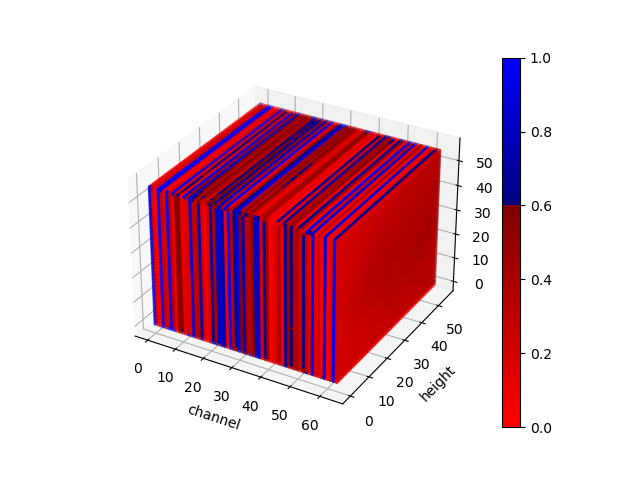

Figure(640x480)


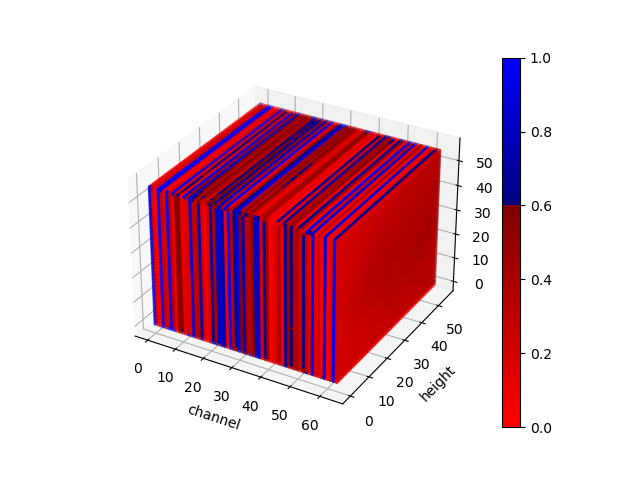

In [7]:
x = b_map.draw()
print(x)

In [16]:
bc = SparsityMap1D(b.group_by('channel').avg, labels=['channel'])

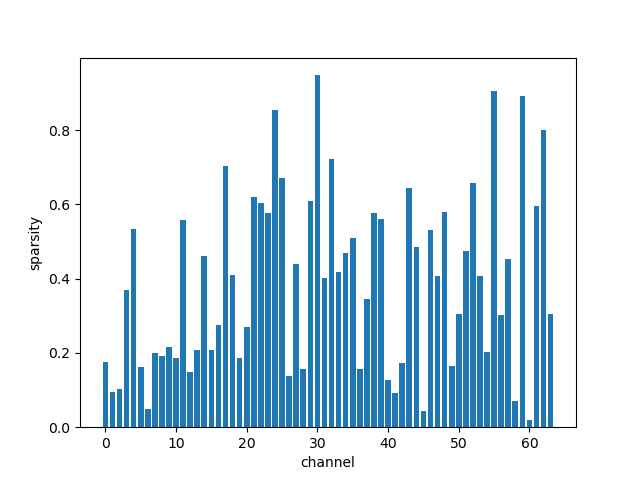

1


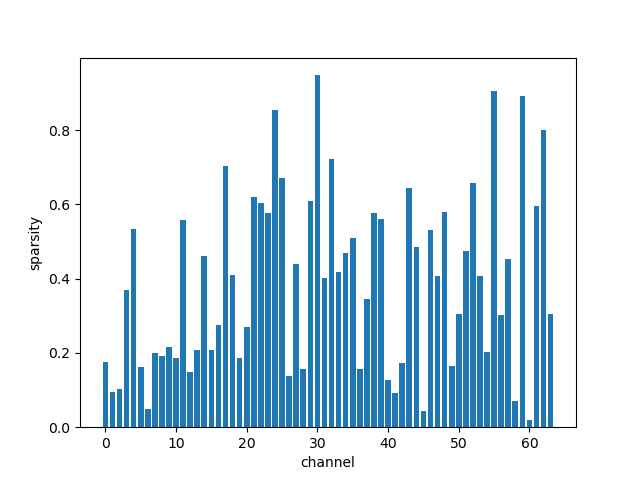

In [22]:
_ = bc.draw()
print('1')

# Sparsity Data on Channels

In [23]:
channel_avg1 = SparsityMap1D(b.slice_batch(0,128).group_by('channel').avg)
channel_avg2 = SparsityMap1D(b.slice_batch(128,256).group_by('channel').avg)

In [24]:
channel_avg1.sparsity_tensor

array([0.15347228, 0.06565888, 0.12512705, 0.35825395, 0.51520149,
       0.14870406, 0.05487185, 0.19438327, 0.17837711, 0.19629654,
       0.13022909, 0.54321289, 0.13309401, 0.18348912, 0.43966239,
       0.23486328, 0.31626923, 0.6796601 , 0.46578045, 0.16982721,
       0.22936264, 0.61615862, 0.59129614, 0.6248854 , 0.8604537 ,
       0.67447834, 0.13286482, 0.40557239, 0.16953823, 0.66205457,
       0.94079839, 0.3659095 , 0.68123455, 0.39331304, 0.42322276,
       0.51303412, 0.14346749, 0.37318888, 0.57761928, 0.5386066 ,
       0.14929199, 0.08161521, 0.14083925, 0.68462512, 0.51229422,
       0.03977001, 0.5065918 , 0.35879454, 0.59207091, 0.13712482,
       0.27540806, 0.45416633, 0.61419304, 0.36469378, 0.17572395,
       0.90905762, 0.28442632, 0.4573576 , 0.06070881, 0.83433813,
       0.01471321, 0.60018734, 0.84190151, 0.27535326])

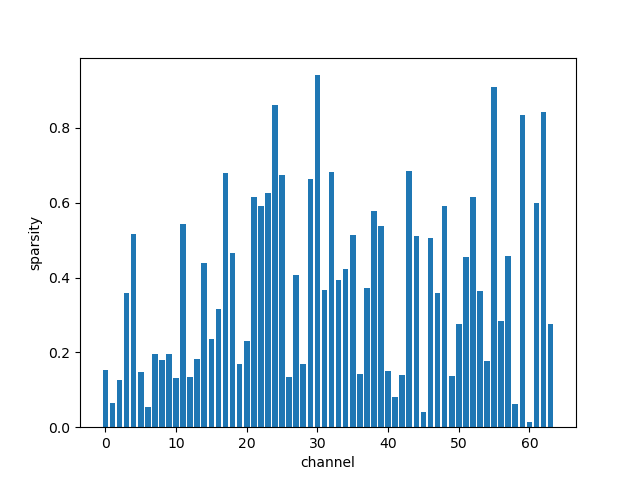

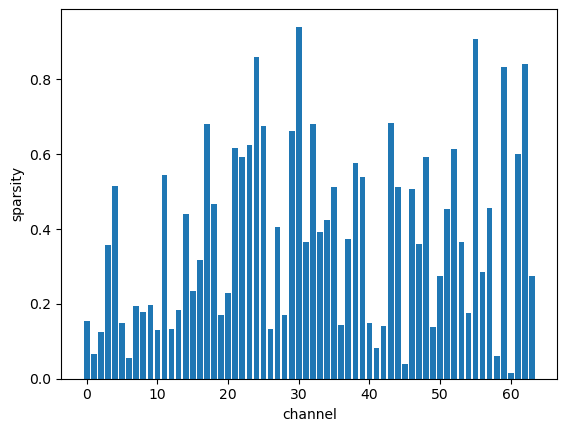

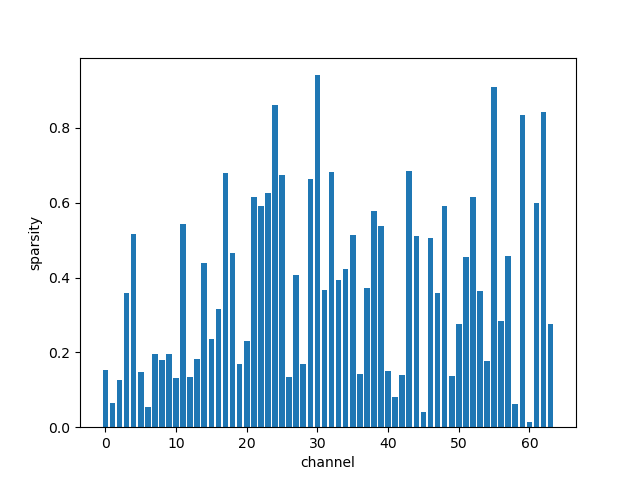

In [26]:
channel_avg1.draw()

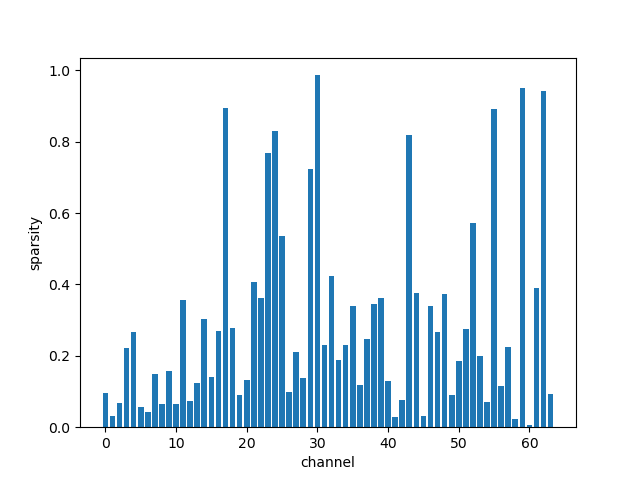

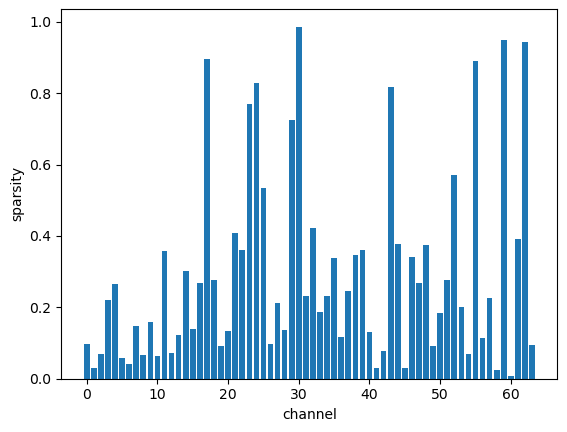

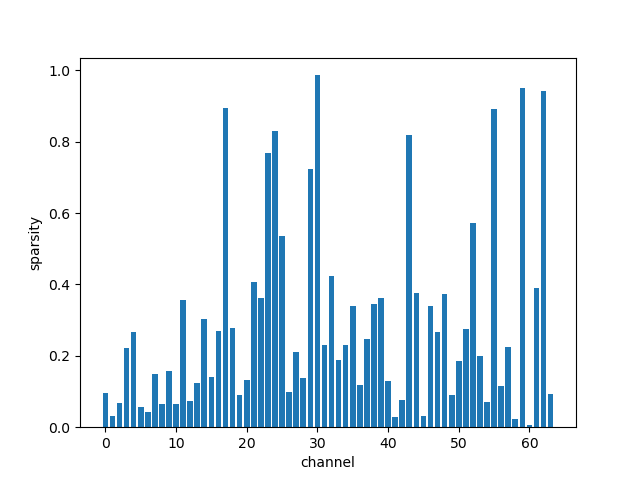

In [25]:
channel_avg2.draw()

# Bar chart on channel dim

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

def bar_chart(avg, std_var, labels=['channel']):
    avg = avg.flatten()
    std_var = std_var.flatten()
    
    fig, ax = plt.subplots()
    x_pos = range(len(avg))
    labels = map(lambda x: str(x), x_pos)
    
    ax.bar(x_pos, avg, yerr=std_var, align='center', alpha=0.5, ecolor='black', capsize=3)
    ax.set_ylabel('Sparsity')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    
    plt.show()

In [6]:
bar_chart(b.group_by('channel').avg, b.group_by('channel').std_var)

KeyboardInterrupt: 

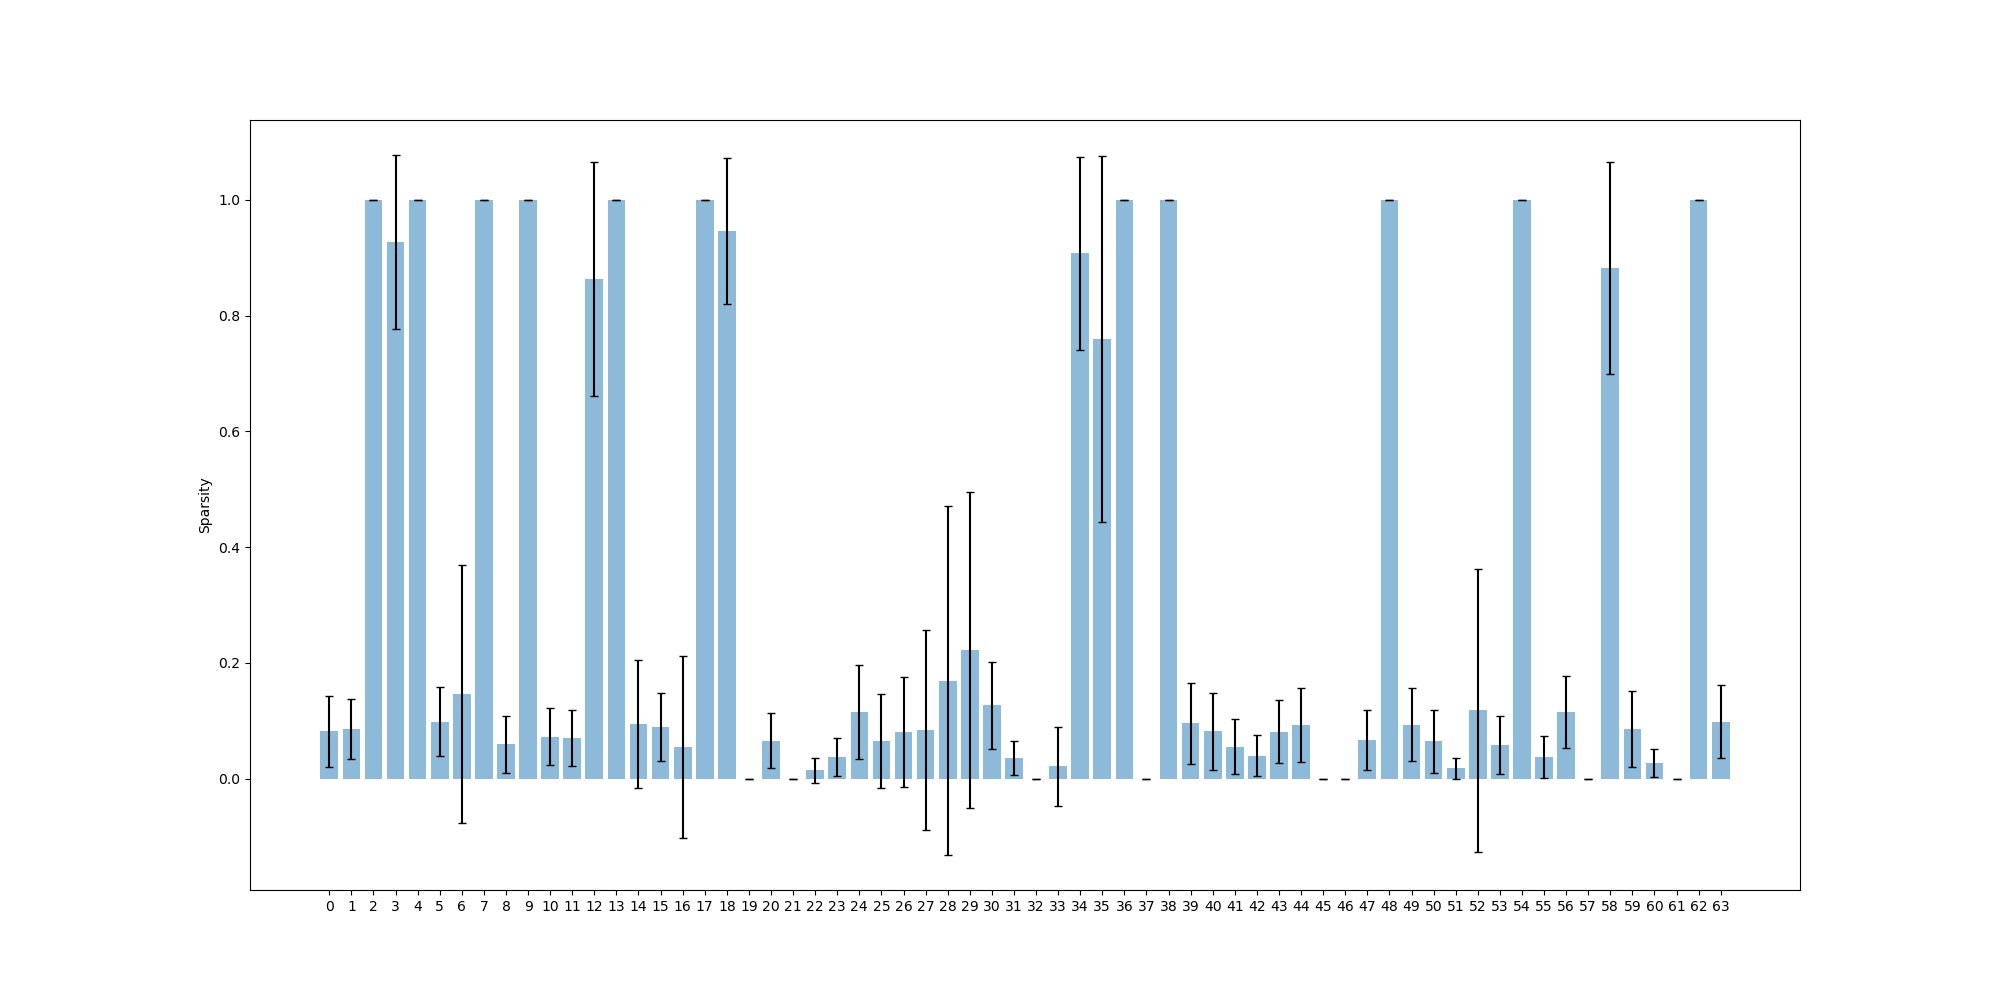

In [7]:
bar_chart(b2.group_by('channel').avg, b2.group_by('channel').std_var)

# After L1 Pruned

# Tile in Height/Width Dim

In [14]:
M2D = SparsityMap2D(b.avg[4, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])

<IPython.core.display.Javascript object>


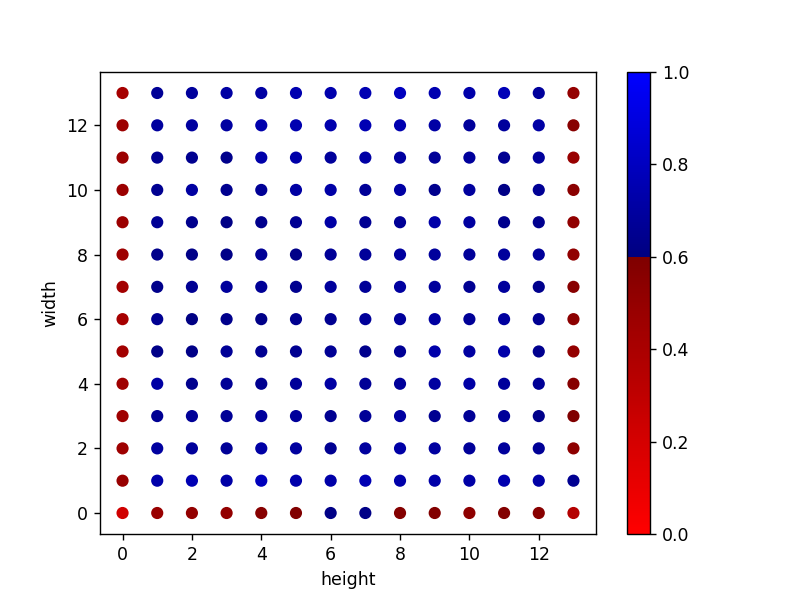

In [15]:
M2D.draw()

In [16]:
M2D_var1 = SparsityMap2D(b.slice_batch(0,128).avg[4, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])
M2D_var2 = SparsityMap2D(b.slice_batch(128,256).avg[4, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])

<IPython.core.display.Javascript object>


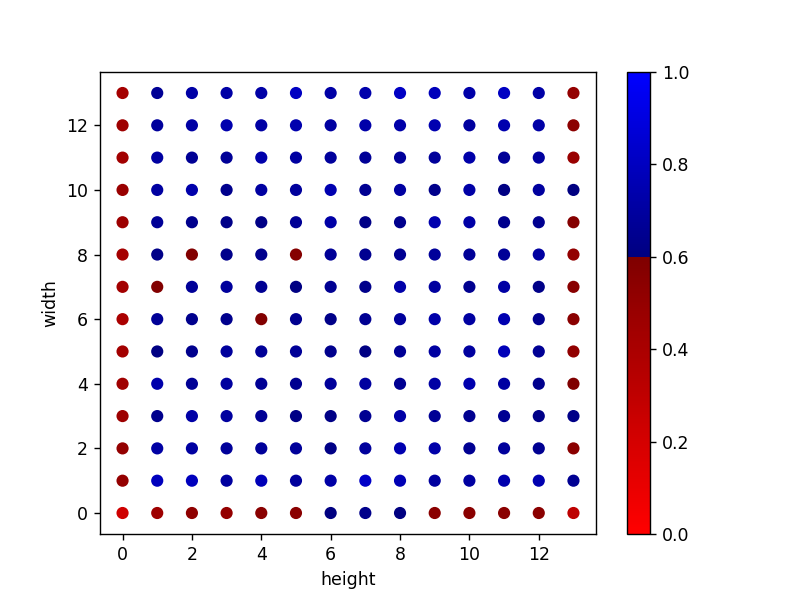

In [17]:
M2D_var1.draw()

<IPython.core.display.Javascript object>


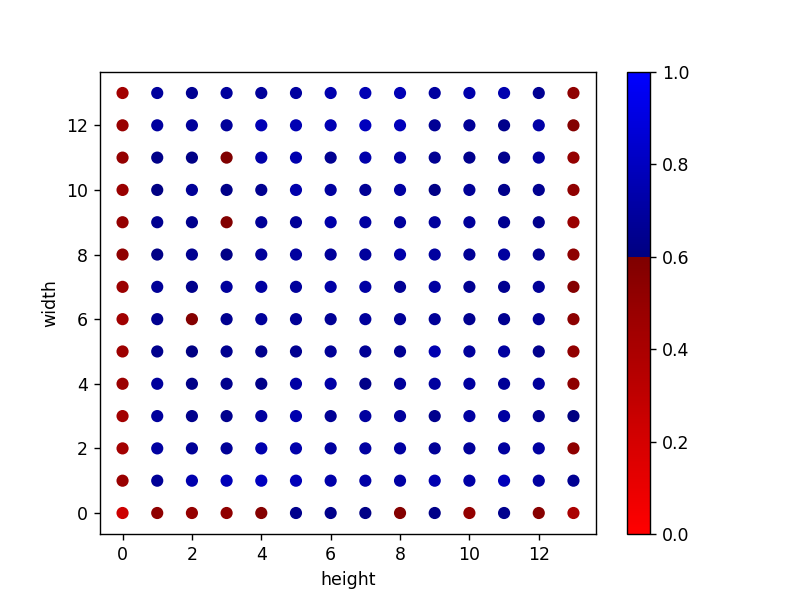

In [18]:
M2D_var2.draw()

# Weight Analysis

In [19]:
import torch
net = torch.load('/home/yzf/download/resnet18-5c106cde.pth')

In [20]:
net.keys()

odict_keys(['conv1.weight', 'bn1.running_mean', 'bn1.running_var', 'bn1.weight', 'bn1.bias', 'layer1.0.conv1.weight', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.conv2.weight', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.1.conv1.weight', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.conv2.weight', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer2.0.conv1.weight', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.conv2.weight', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.running_mean', 'layer2.0.downsample.1.running_var', 'layer2.0.downsample.1.weight', 'layer2.0.do

In [21]:
l1b0n1_bias = torch.tensor(net['layer3.0.bn1.bias']).numpy()

/tmp/ipykernel_7582/3565325324.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  l1b0n1_bias = torch.tensor(net['layer3.0.bn1.bias']).numpy()


<IPython.core.display.Javascript object>


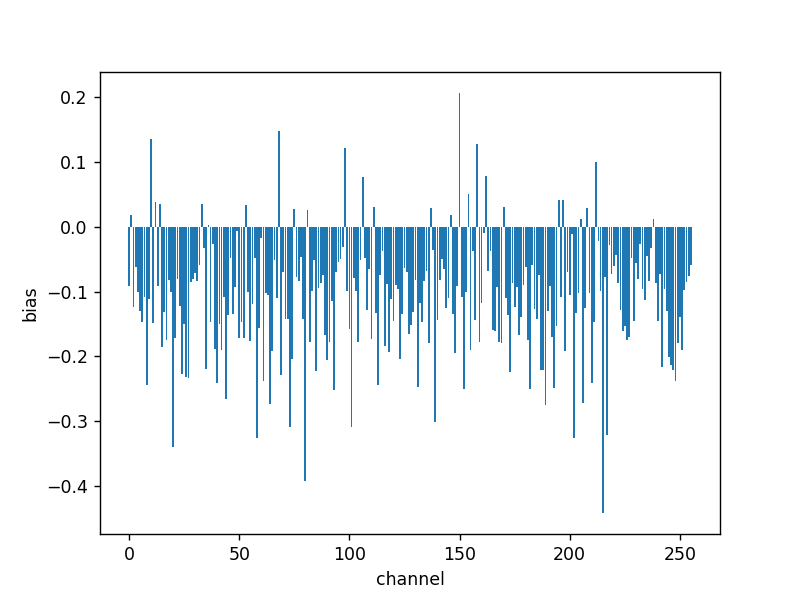

Text(0, 0.5, 'bias')

In [22]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(range(len(l1b0n1_bias)), l1b0n1_bias)
ax.set_xlabel('channel')
ax.set_ylabel('bias')